In [640]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 
mpl.rcParams['legend.fontsize'] = 16

In [643]:
res = pd.read_csv('../data/master_table.tsv', sep='\t', index_col=0)
res = res[(res.padj_58 < 0.05) | (res.padj_50 < 0.05)]
res.sort_values(['chromosome_name', 'start_position'], inplace=True)

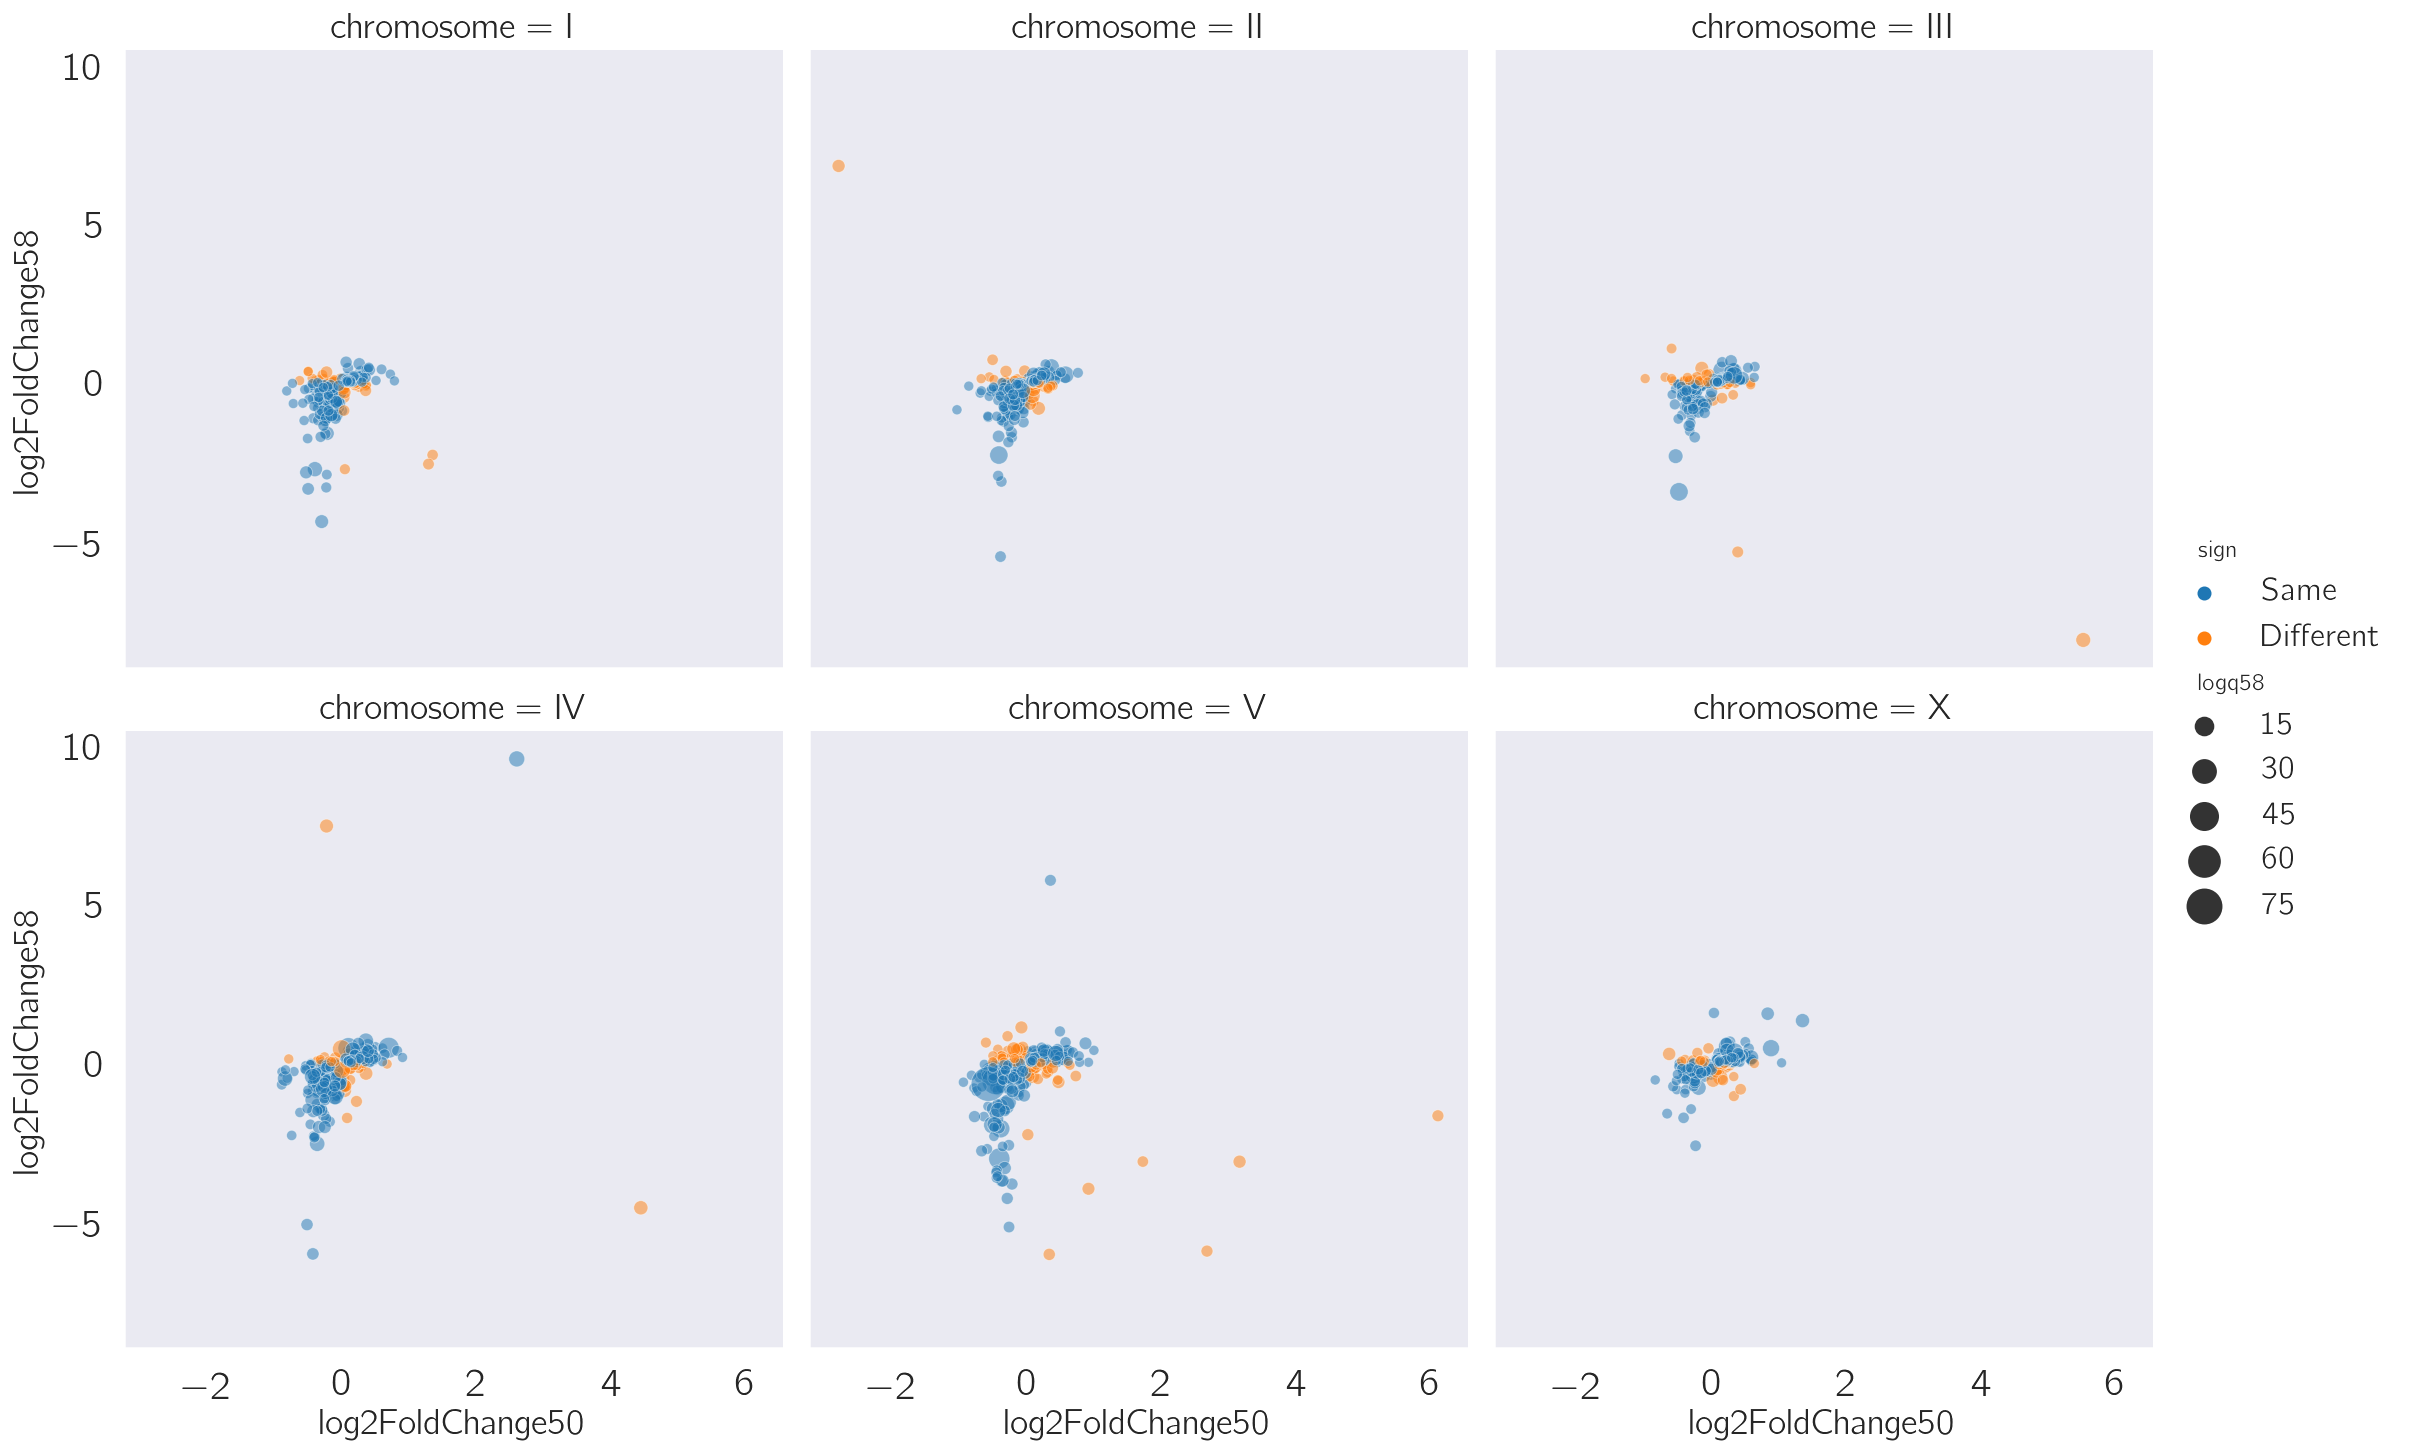

In [645]:
sns.relplot(
    data=res.rename(columns={'chromosome_name': 'chromosome',
                             'log2FoldChange_50': 'log2FoldChange50',
                             'log2FoldChange_58': 'log2FoldChange58',
                             'logq_58': 'logq58'
                            }),
    x="log2FoldChange50", y="log2FoldChange58",
    col="chromosome", size='logq58', col_wrap=3,
    kind="scatter", sizes=(25, 300), hue='sign',
    alpha=0.5
)

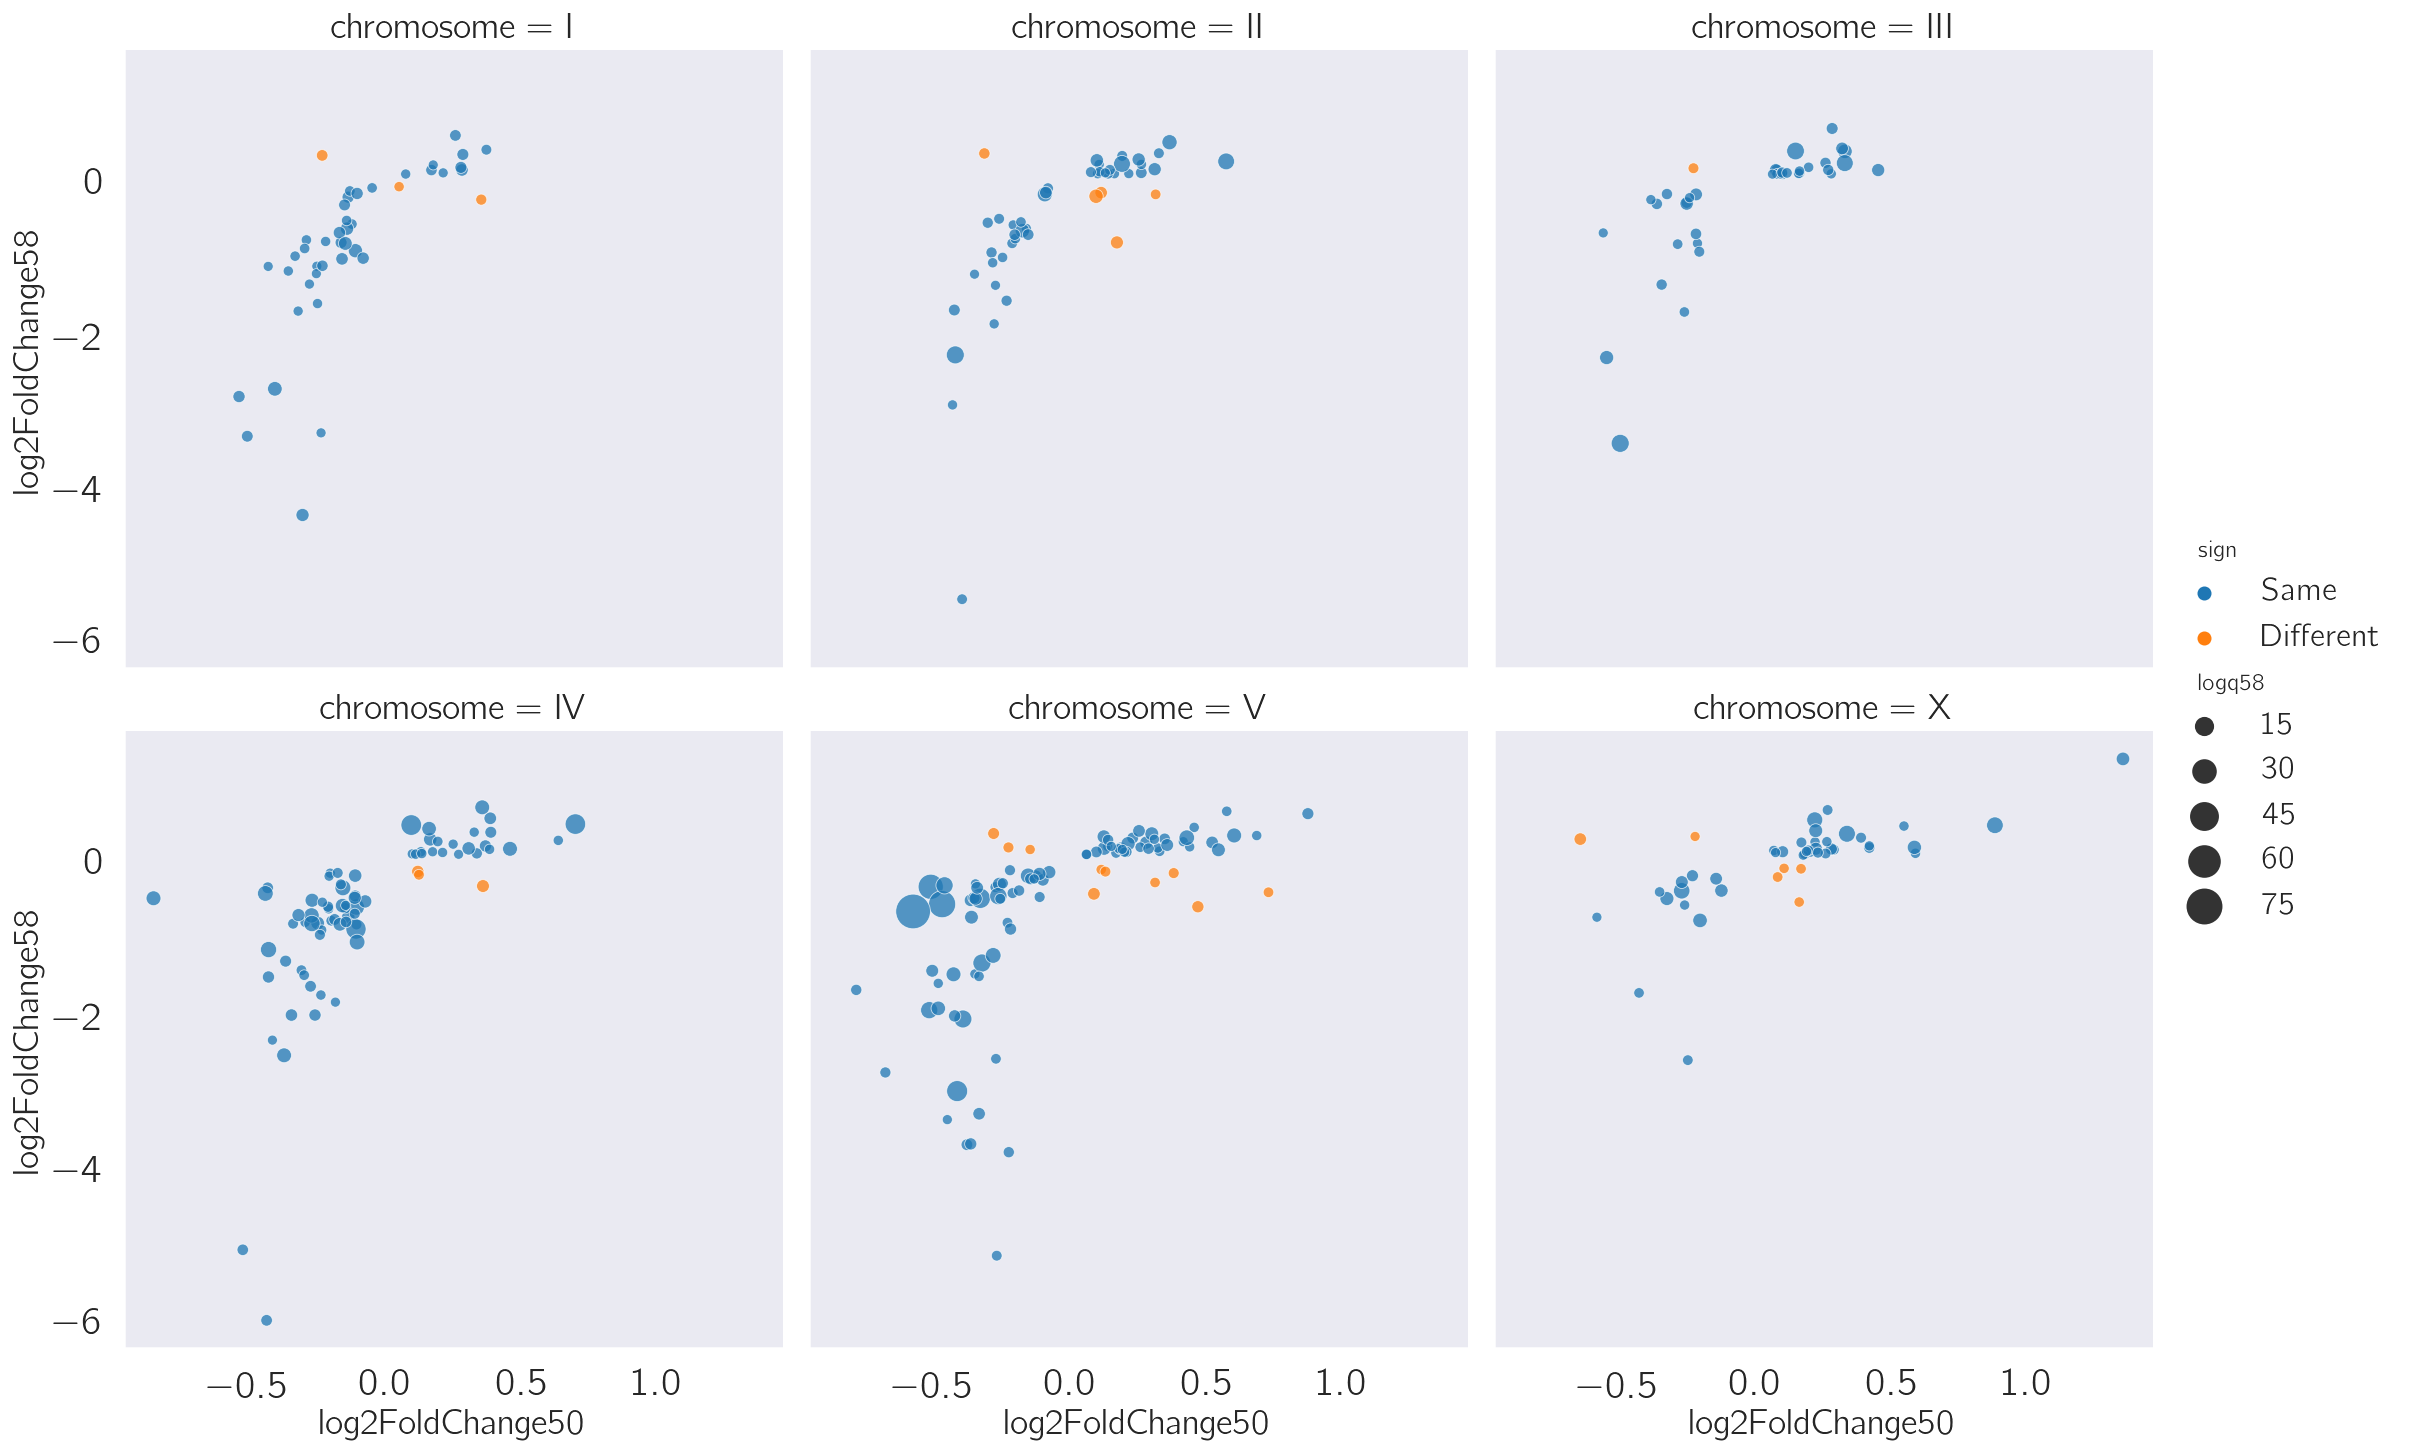

In [646]:
sns.relplot(
    data=res[(res.padj_58 < 0.05) & (res.padj_50 < 0.05)].rename(columns={'chromosome_name': 'chromosome',
                                                                          'log2FoldChange_50': 'log2FoldChange50',
                                                                          'log2FoldChange_58': 'log2FoldChange58',
                                                                          'logq_58': 'logq58'
                                                                         }),
    x="log2FoldChange50", y="log2FoldChange58",
    col="chromosome", size='logq58', col_wrap=3,
    kind="scatter", sizes=(25, 300), hue='sign',
    alpha=0.75
)

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in true_d

(-1.0, 1.0)

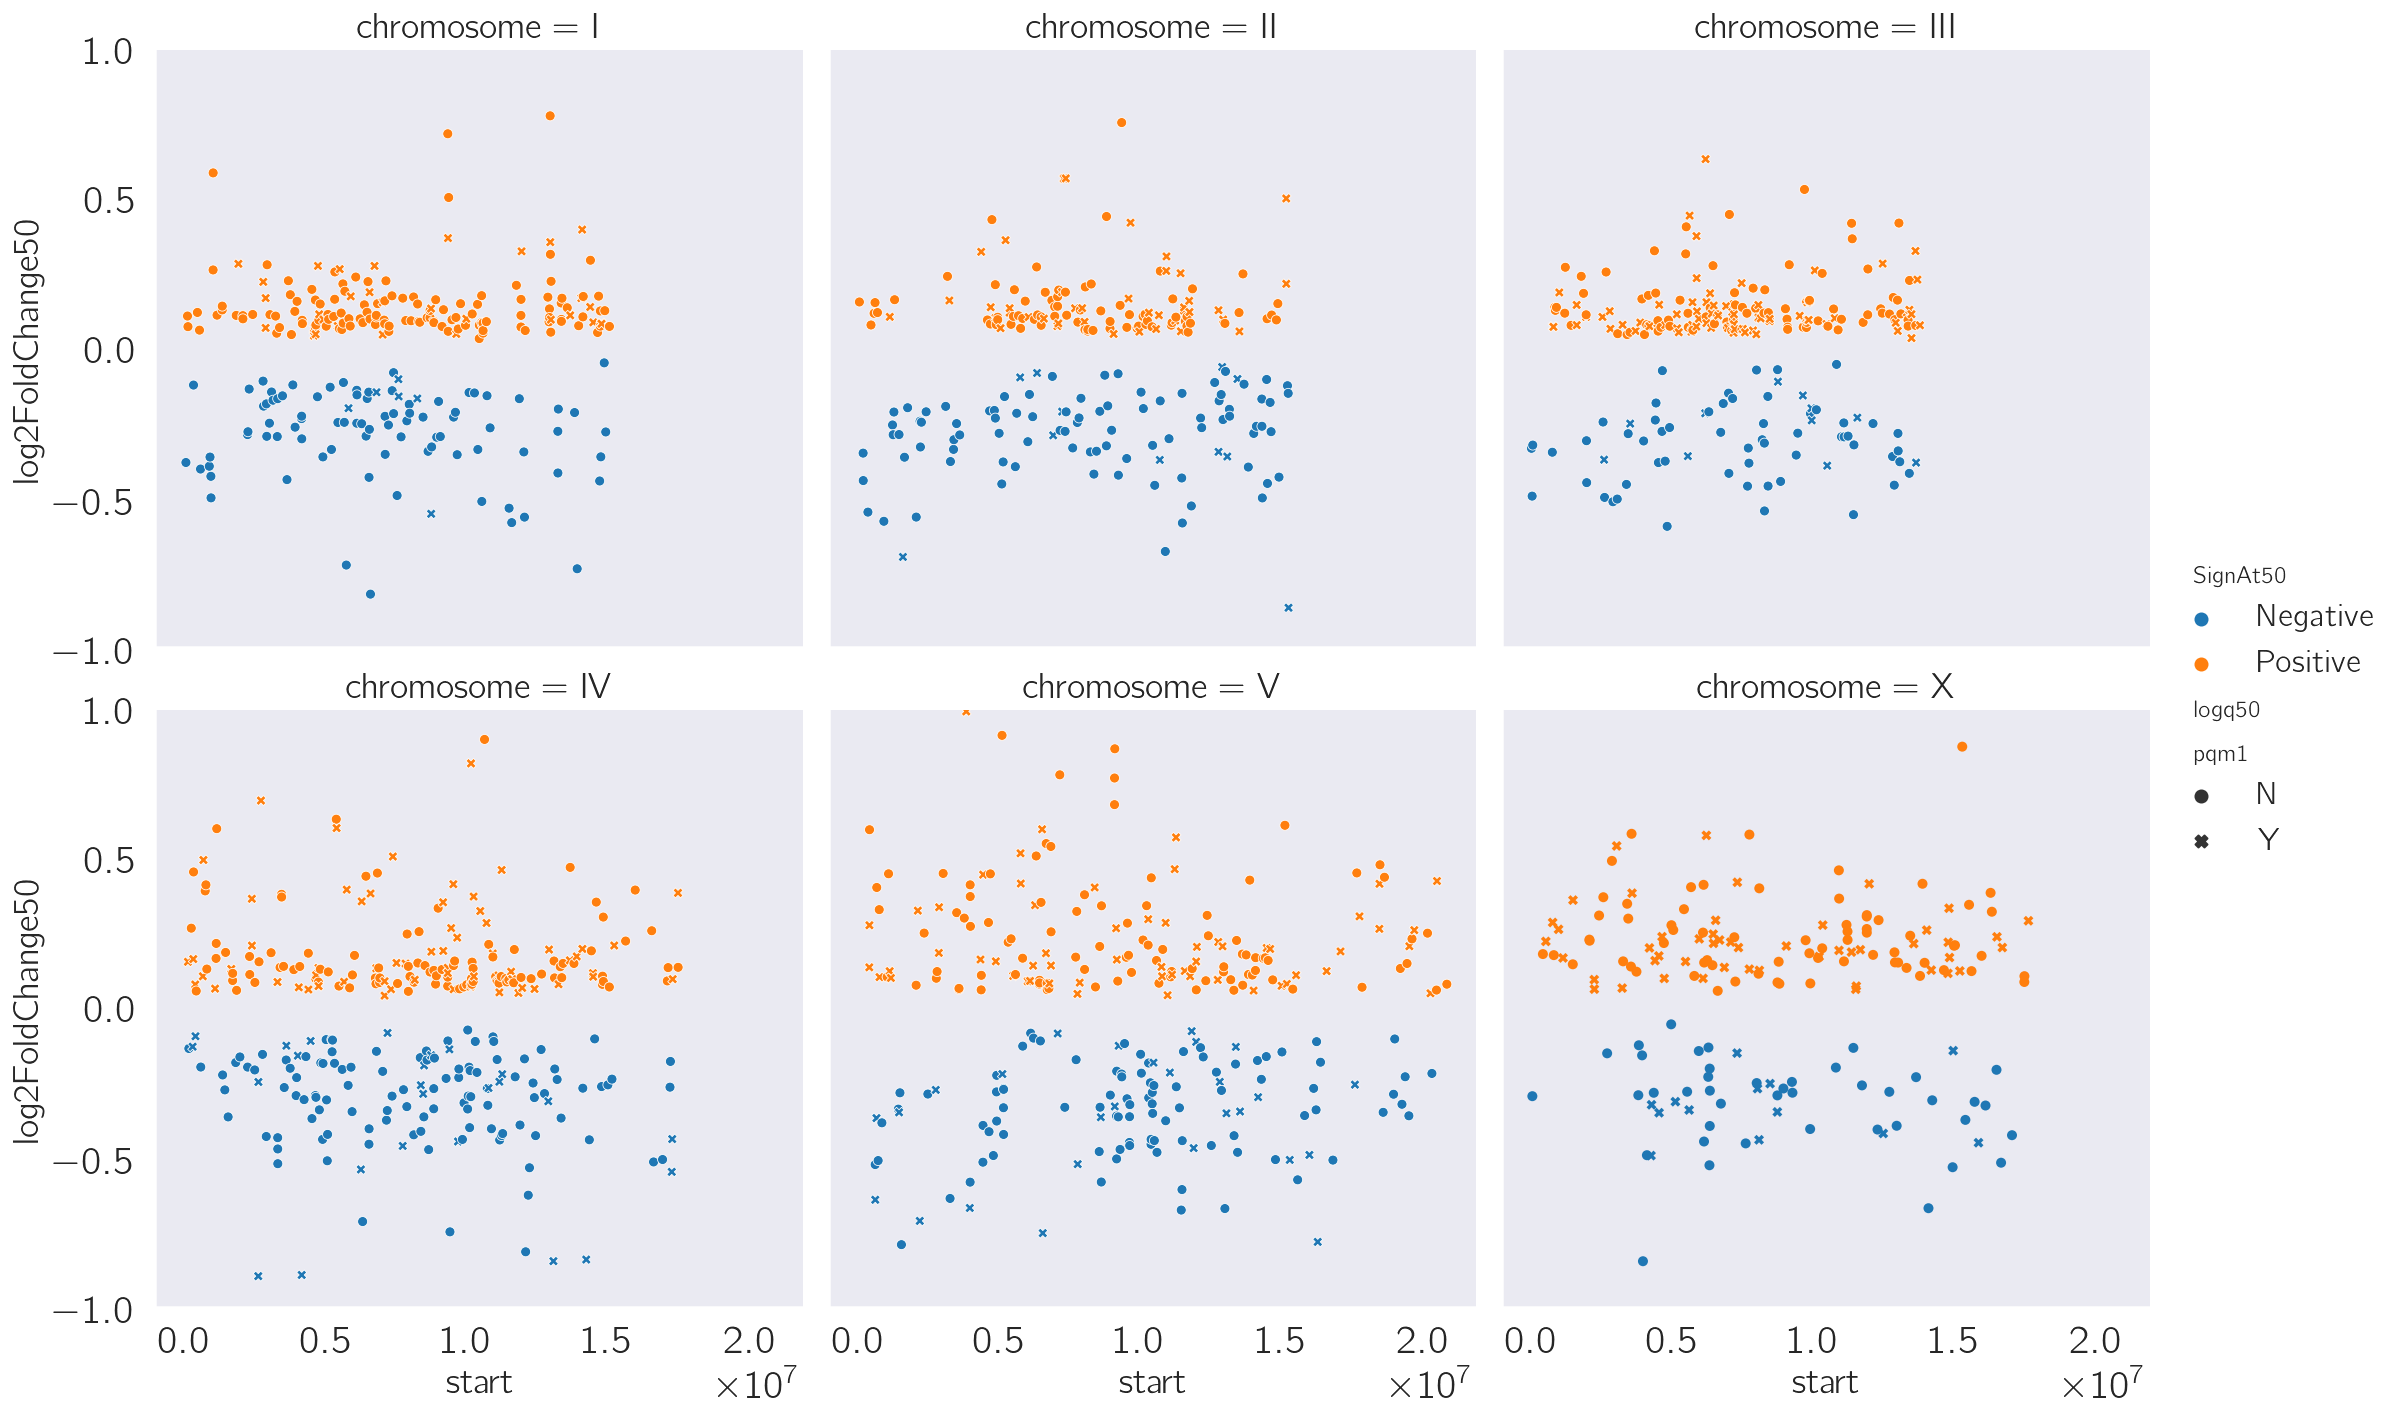

In [653]:
def relplot(x='50', both = False):
    if both is False:
        tmp = res[(res['padj_' + x] < 0.05)].copy()
    else:
        tmp = res[(res.padj_50 < 0.05) & (res.padj_58 < 0.05)].copy()
    sns.relplot(
        data=tmp.rename(columns={'start_position': 'start',
                                 'log2FoldChange_' + x: 'log2FoldChange' + x,
                                 'chromosome_name': 'chromosome',
                                 'logq_' + x: 'logq' + x}),
        x="start", y="log2FoldChange" + x,
        col="chromosome", size='logq' + x, style='pqm1',
        kind="scatter", sizes=(25, 300), hue='SignAt' + x,
        col_wrap=3
    )

relplot('50')
plt.ylim(-1, 1)

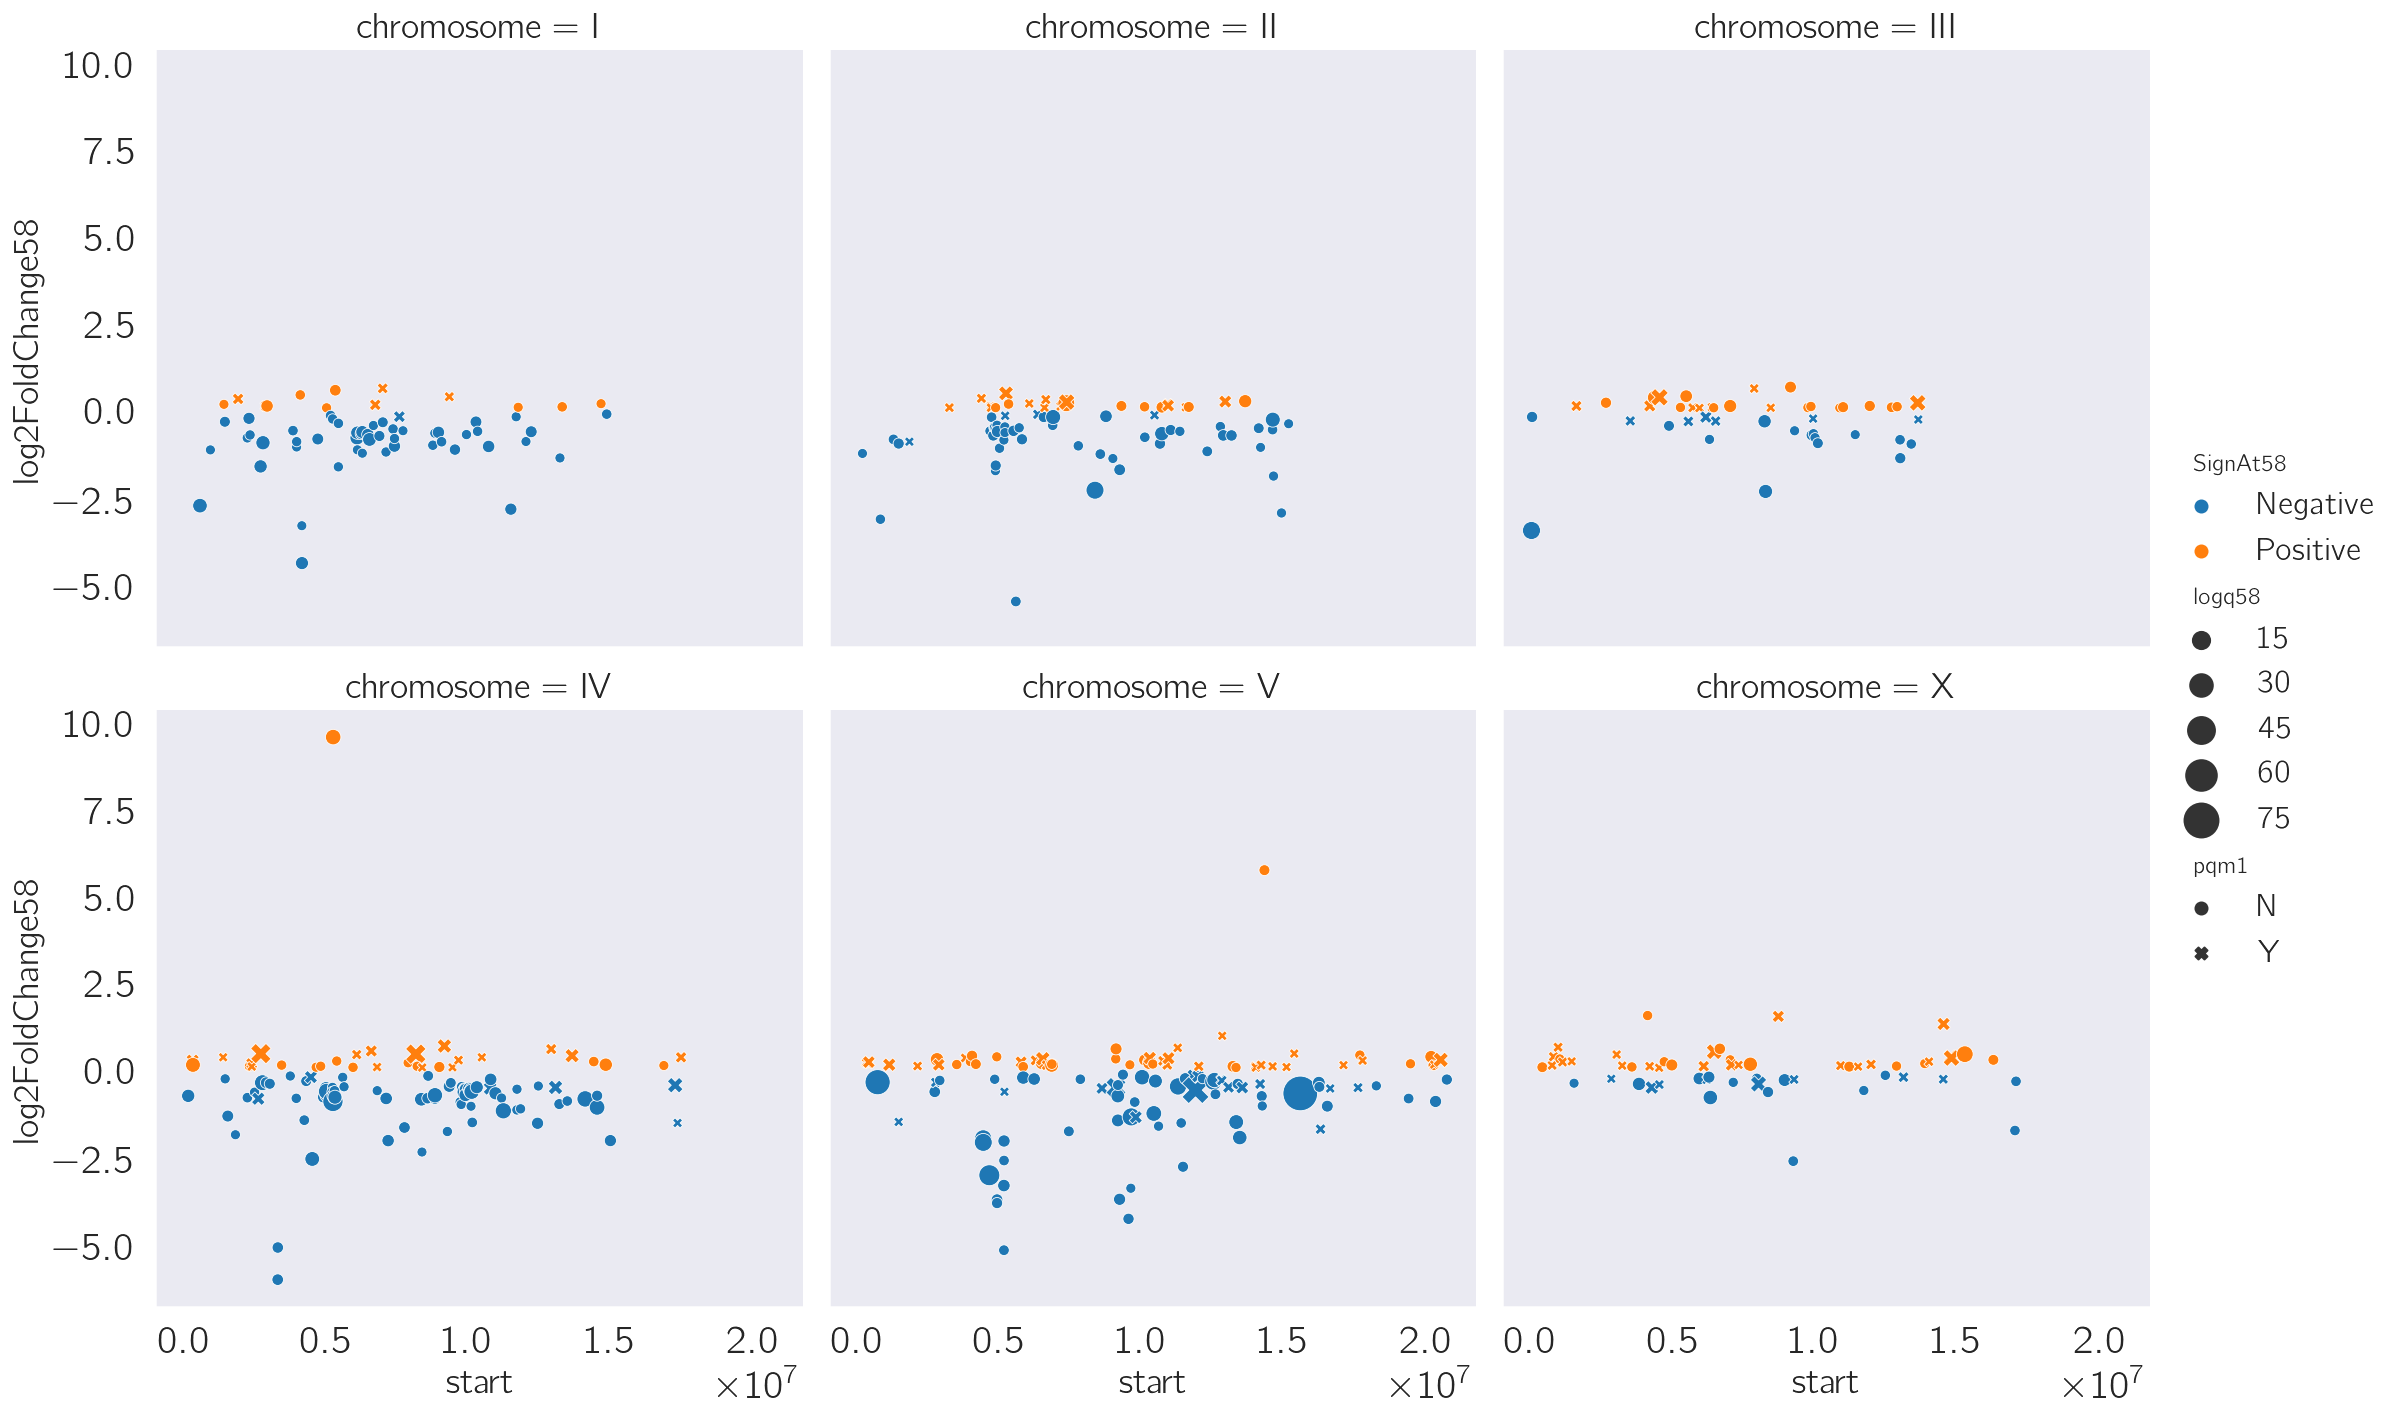

In [654]:
relplot('58')

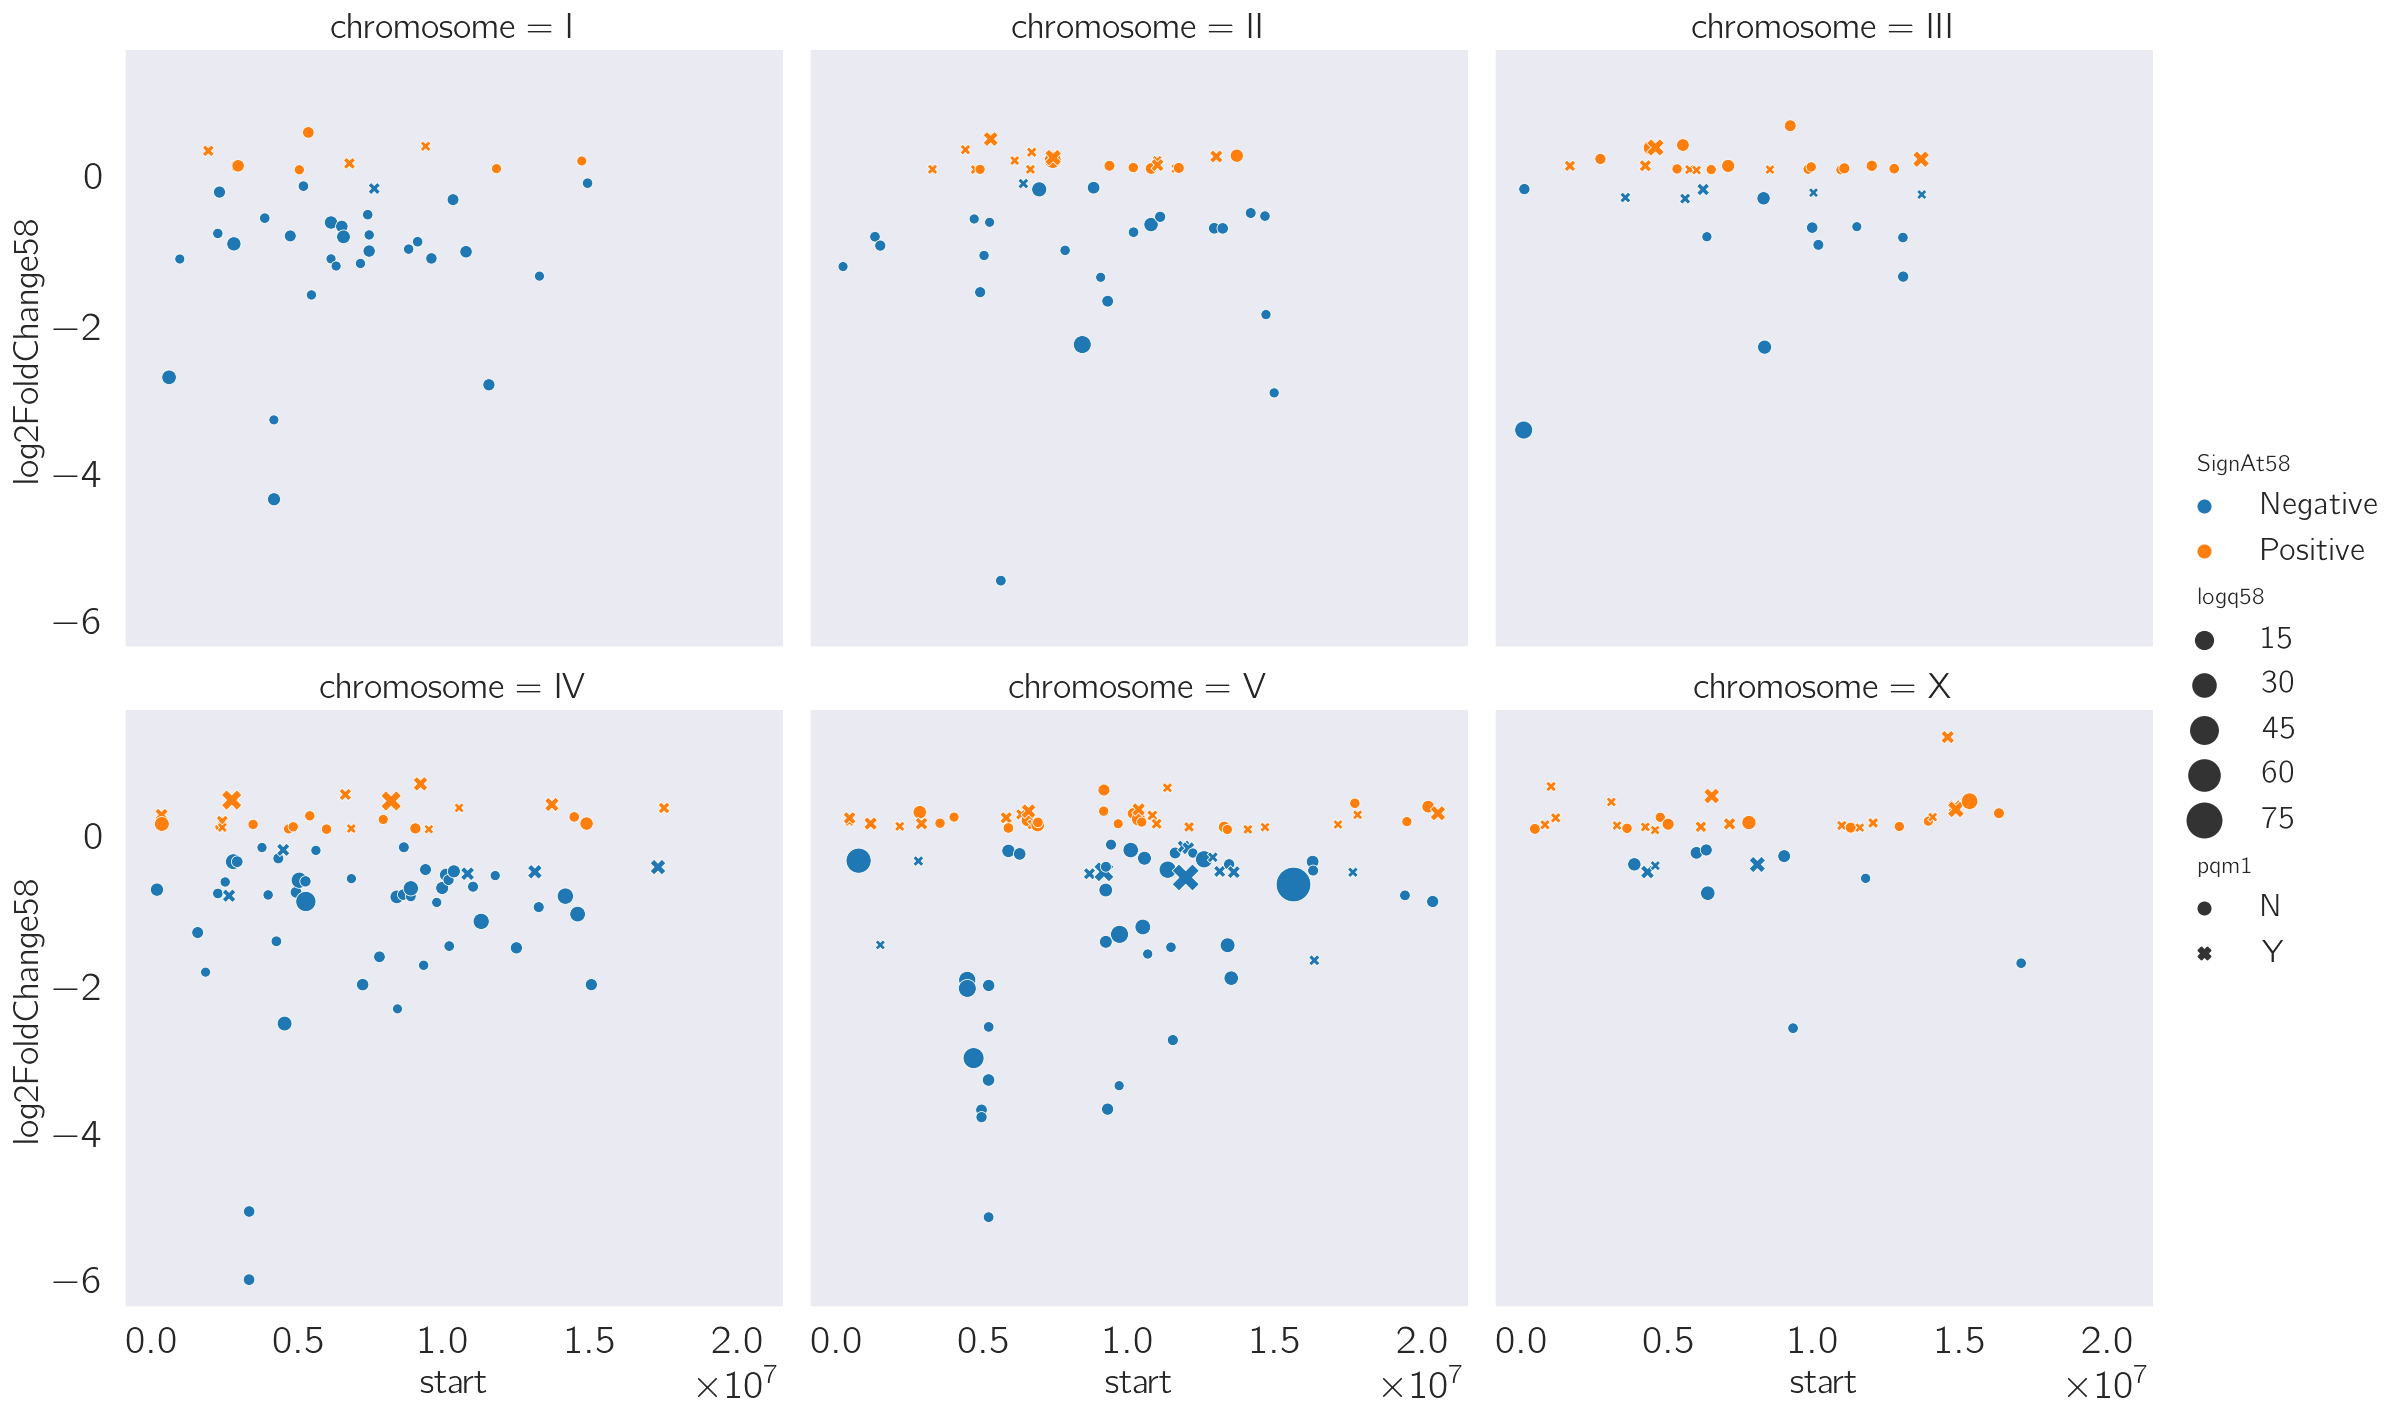

In [655]:
relplot('58', both=True)